# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### Revise

In [19]:
bins = np.linspace(20, 70, num = 11)
age_datas = pd.cut(app_train['DAYS_BIRTH']/365,bins ).value_counts()
age_datas

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: DAYS_BIRTH, dtype: int64

In [14]:
print("Correlation between TARGET and DAYS_BIRTH", app_train['DAYS_BIRTH'].corr(app_train['TARGET']))
(app_train['DAYS_BIRTH']/365).describe()

Correlation between TARGET and DAYS_BIRTH 0.07823930830982712


count    307511.000000
mean        -43.936973
std          11.956133
min         -69.120548
25%         -53.923288
50%         -43.150685
75%         -34.008219
max         -20.517808
Name: DAYS_BIRTH, dtype: float64

In [15]:
# 將年齡相關資料, 另外存成一個 DataFrame 來處理
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# 將年齡資料離散化 / 分組
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [42]:
new_data = age_data.groupby(by='YEARS_BINNED').mean()
new_data

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


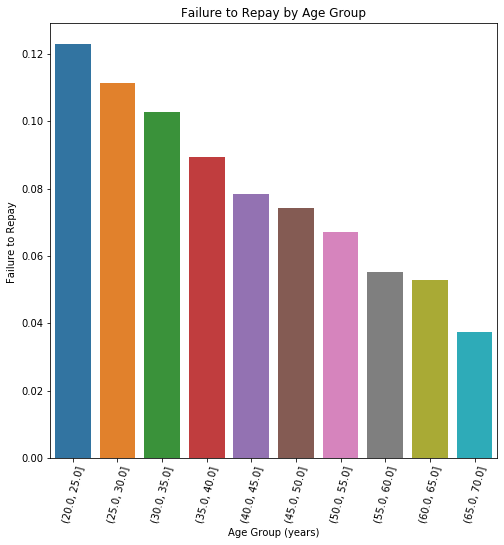

In [45]:
import seaborn as sns 
plt.figure(figsize = (8, 8))
px = new_data.index
py = new_data['TARGET'] #注意y軸單位
sns.barplot(px, py)

plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay ')
plt.title('Failure to Repay by Age Group');

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [59]:
AMT_CREDIT_data = app_train[['AMT_CREDIT','TARGET']]
AMT_CREDIT_data['AMT_CREDIT_gp'] = pd.qcut(AMT_CREDIT_data['AMT_CREDIT'],10)
AMT_CREDIT_gp = AMT_CREDIT_data.groupby(by='AMT_CREDIT_gp').mean()
AMT_CREDIT_gp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AMT_CREDIT,TARGET
AMT_CREDIT_gp,,
"(44999.999, 180000.0]",1.380549e+05,0.067221
"(180000.0, 254700.0]",2.284170e+05,0.077772
"(254700.0, 306306.0]",2.778057e+05,0.082071
"(306306.0, 432000.0]",3.579177e+05,0.100335
"(432000.0, 513531.0]",4.698401e+05,0.095893
"(513531.0, 604152.0]",5.526219e+05,0.105220
"(604152.0, 755190.0]",6.843738e+05,0.085364
"(755190.0, 900000.0]",8.321433e+05,0.070799
"(900000.0, 1133748.0]",1.032279e+06,0.068823


In [60]:
AMT_CREDIT_data['AMT_CREDIT_gp'].value_counts()

(604152.0, 755190.0]      34066
(44999.999, 180000.0]     33204
(180000.0, 254700.0]      31721
(432000.0, 513531.0]      30826
(513531.0, 604152.0]      30726
(306306.0, 432000.0]      30707
(1133748.0, 4050000.0]    30593
(755190.0, 900000.0]      29958
(900000.0, 1133748.0]     28319
(254700.0, 306306.0]      27391
Name: AMT_CREDIT_gp, dtype: int64

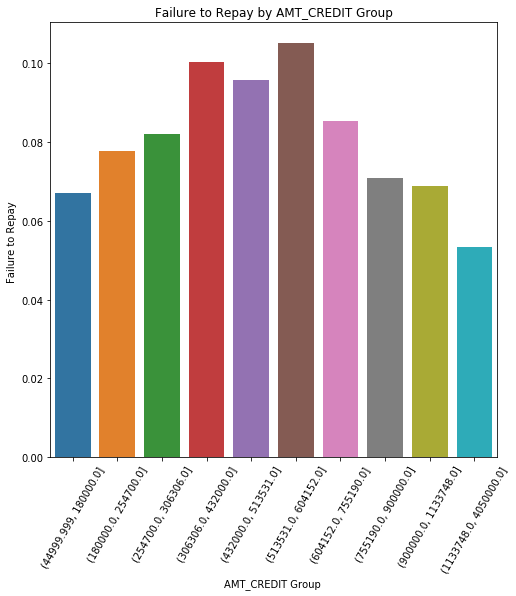

In [65]:
plt.figure(figsize = (8, 8))
px = AMT_CREDIT_gp.index
py = AMT_CREDIT_gp['TARGET'] #注意y軸單位
sns.barplot(px, py)

plt.xticks(rotation = 60); plt.xlabel('AMT_CREDIT Group '); plt.ylabel('Failure to Repay ')
plt.title('Failure to Repay by AMT_CREDIT Group');

In [11]:
app_train['AMT_ANNUITY_gp'] = pd.cut(app_train['AMT_ANNUITY'],4)

In [12]:
app_train['AMT_ANNUITY_gp']

0         (1359.09, 65718.0]
1         (1359.09, 65718.0]
2         (1359.09, 65718.0]
3         (1359.09, 65718.0]
4         (1359.09, 65718.0]
                 ...        
307506    (1359.09, 65718.0]
307507    (1359.09, 65718.0]
307508    (1359.09, 65718.0]
307509    (1359.09, 65718.0]
307510    (1359.09, 65718.0]
Name: AMT_ANNUITY_gp, Length: 307511, dtype: category
Categories (4, interval[float64]): [(1359.09, 65718.0] < (65718.0, 129820.5] < (129820.5, 193923.0] < (193923.0, 258025.5]]

In [13]:
app_train['AMT_ANNUITY_gp'].value_counts()

(1359.09, 65718.0]      302183
(65718.0, 129820.5]       5194
(129820.5, 193923.0]        85
(193923.0, 258025.5]        37
Name: AMT_ANNUITY_gp, dtype: int64